# Численное вычисление интеграла

## Юрин Андрей 3821Б1ПР1

### Задача 3

Используя интеграл

$$ -\cfrac{4}{9} = \int_{0}^{1}\sqrt[2]{x}\ln{x}dx $$
 
можно найти приближение к $-\cfrac{4}{9}$. Используйте правило прямоугольников, трапеций и Симпсона с **2**, **4**,**8**,**16**,**32**,**64** и **128** узлами. Затабулируйте погрешность. Как уменьшается погрешность при удвоении числа элементарных отрезков? Почему с некоторого момента погрешность не уменьшается? Составленная программа должна выводить графики подинтегральных функций, табулированные погрешности и значения интегральных сумм с графиками.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import integrate
from scipy import interpolate

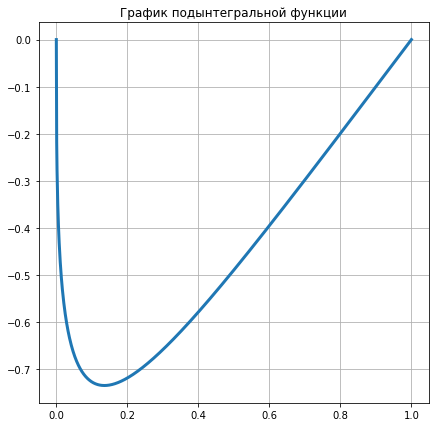

In [2]:
xx = np.linspace(1e-12, 1, 1000)
yy = np.sqrt(xx)*np.log(xx)

plt.rcParams["figure.figsize"] = 7,7
plt.title('График подынтегральной функции')
plt.plot(xx, yy, linewidth = 3)
plt.grid()
pass

Для удобства создадим метод, который выводит значение интеграла, количество узлов, абсолютную и относительную ошибки, и метод, который чертит график.

In [3]:
a = 1e-12
b = 1
numberNodes = [2, 4, 8, 16, 32, 64, 128]
ans = -4/9
x = np.linspace(0, ans , len(numberNodes))

def PrintValues(method):
    print("%-30s%-25s%-25s%-15s" % ("Количество узлов:","Значение интеграла:", "Абсолютная ошибка:", "Относительная ошибка:"))
    for i in range(len(numberNodes)):
        print("%-30d%-25f%-25f%-15f" % (numberNodes[i], method[i], abs(ans - method[i]), abs(ans - method[i])/abs(ans)))

def PrintGraph(function, nameFunction, titleGraph, sizeX, sizeY, drawAns = True, yLog = False):
    if (drawAns):
        plt.hlines(ans, numberNodes[0], numberNodes[-1], color = 'r')
       
    if (yLog):
        plt.yscale('log')
        
    plt.xscale('log')
    plt.rcParams["figure.figsize"] = (sizeX, sizeY)
    plt.xticks(numberNodes)
    for f in function:
        plt.plot(numberNodes, f, 'o')  
        plt.plot(numberNodes, f)
        
    for texts in nameFunction:
            plt.text(texts[0],texts[1],texts[2])

    plt.title(titleGraph)
    plt.grid(True)

pass

Создадим метод, который считает интеграл по формуле прямоугольников. Т.к. эта формула зависит от способа построения прямоугольников, то создадим вспомогательный метод, который, в зависимости от ввида прямоугольника, считает x.

Также создадим метод, который считает интеграл по формулам Симпсона и трапеции. Для подсчёта самого интеграла воспользуемся встроенными функциями.

In [4]:
def FormulaX(nameMethod, length):
    return{
        nameMethod == "Right": np.arange(a + length, b + np.finfo(float).eps, length),
        nameMethod == "Left": np.arange(a, b, length),
        nameMethod == "Middle": np.arange(a + length/2, b, length)
    }[True]

def Integral(x, y, nameMethod):
    return{
        nameMethod == "Simpson": integrate.simps(y,x),
        nameMethod == "Trapezoidal": integrate.trapz(y, x)
    }[True]

def RiemannSum(nodesNumber, nameMethod):
    answers = np.array([])
    for n in nodesNumber:
        length = (b - a) / n
        x = FormulaX(nameMethod, length)
        y = np.sqrt(x) * np.log(x)                                   
        sumAreas = length * sum(y)
        answers = np.append(answers, sumAreas)
    return answers

def SimpsonAndTrapezoidal (nodesNumber, nameMethod):
    answers = np.array([])
    for n in nodesNumber:
        x = np.linspace(a, b, n + 1)
        y = np.sqrt(x)*(np.log(x))
        integral = Integral(x, y, nameMethod)
        answers = np.append(answers, integral)
    return answers

### Метод правых прямоугольников

Количество узлов:             Значение интеграла:      Абсолютная ошибка:       Относительная ошибка:
2                             -0.245065                0.199380                 0.448605       
4                             -0.358104                0.086340                 0.194266       
8                             -0.408090                0.036354                 0.081797       
16                            -0.429475                0.014970                 0.033682       
32                            -0.438389                0.006055                 0.013624       
64                            -0.442031                0.002414                 0.005431       
128                           -0.443494                0.000951                 0.002139       


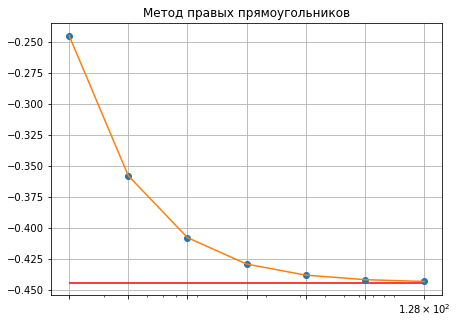

In [27]:
RightRiemannSum = RiemannSum(numberNodes, "Right")
PrintValues(RightRiemannSum)
PrintGraph([RightRiemannSum],[], "Метод правых прямоугольников", 7, 5)

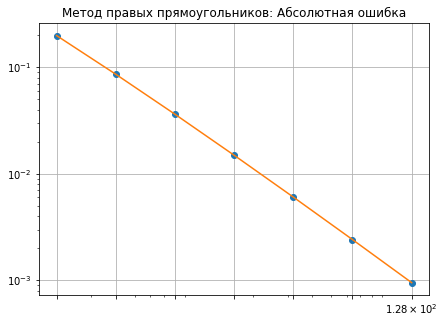

In [6]:
PrintGraph([abs(RightRiemannSum - ans)],[], "Метод правых прямоугольников: Абсолютная ошибка", 7, 5, False, True)

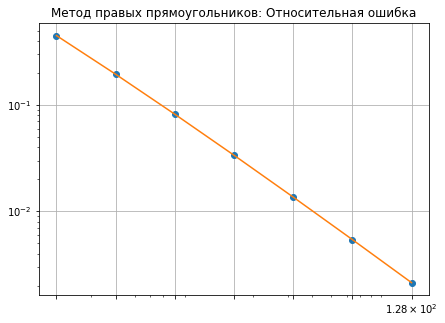

In [7]:
PrintGraph([abs(RightRiemannSum - ans) / abs(ans)],[], "Метод правых прямоугольников: Относительная ошибка", 7, 5, False, True)

### Метод левых прямоугольников

Количество узлов:             Значение интеграла:      Абсолютная ошибка:       Относительная ошибка:
2                             -0.245078                0.199366                 0.448574       
4                             -0.358111                0.086333                 0.194250       
8                             -0.408093                0.036351                 0.081790       
16                            -0.429476                0.014968                 0.033678       
32                            -0.438390                0.006054                 0.013622       
64                            -0.442031                0.002413                 0.005430       
128                           -0.443494                0.000951                 0.002139       


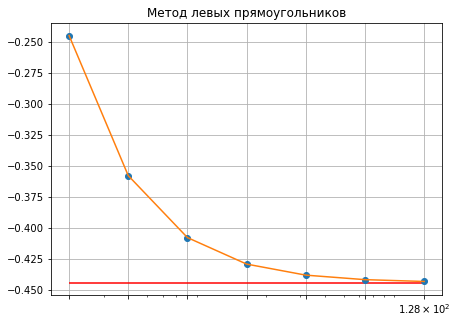

In [8]:
LeftRiemannSum = RiemannSum(numberNodes, "Left")
PrintValues(LeftRiemannSum)
PrintGraph([LeftRiemannSum],[], "Метод левых прямоугольников", 7, 5)

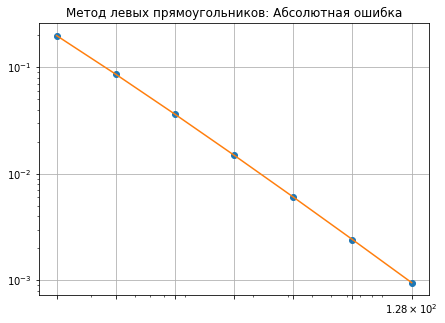

In [9]:
PrintGraph([abs(LeftRiemannSum - ans)],[], "Метод левых прямоугольников: Абсолютная ошибка", 7, 5, False, True)

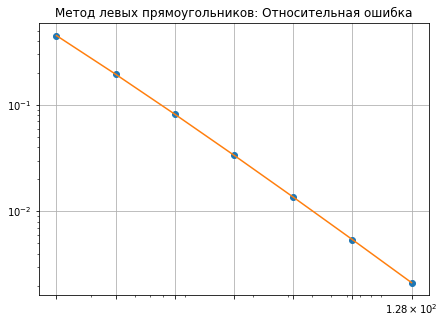

In [10]:
PrintGraph([abs(LeftRiemannSum - ans) / abs(ans)],[], "Метод левых прямоугольников: Относительная ошибка", 7, 5, False, True)

### Метод средних прямоугольников

Количество узлов:             Значение интеграла:      Абсолютная ошибка:       Относительная ошибка:
2                             -0.471144                0.026699                 0.060073       
4                             -0.458076                0.013632                 0.030671       
8                             -0.450859                0.006415                 0.014433       
16                            -0.447304                0.002860                 0.006435       
32                            -0.445672                0.001227                 0.002762       
64                            -0.444957                0.000512                 0.001152       
128                           -0.444654                0.000209                 0.000471       


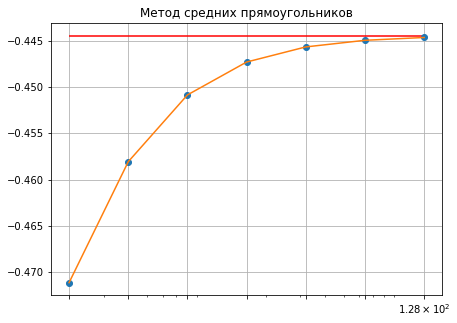

In [11]:
MiddleRiemannSum = RiemannSum(numberNodes, "Middle")
PrintValues(MiddleRiemannSum)
PrintGraph([MiddleRiemannSum],[], "Метод средних прямоугольников", 7, 5)

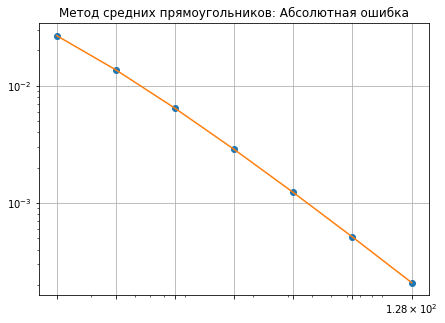

In [12]:
PrintGraph([abs(MiddleRiemannSum - ans)],[], "Метод средних прямоугольников: Абсолютная ошибка", 7, 5, False, True)

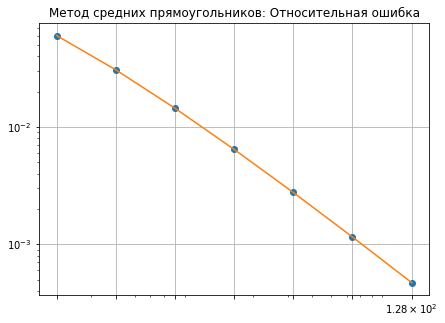

In [13]:
PrintGraph([abs(MiddleRiemannSum - ans) / abs(ans)],[], "Метод средних прямоугольников: Относительная ошибка", 7, 5, False, True)

### Метод трапеций

Количество узлов:             Значение интеграла:      Абсолютная ошибка:       Относительная ошибка:
2                             -0.245071                0.199373                 0.448589       
4                             -0.358108                0.086337                 0.194258       
8                             -0.408092                0.036353                 0.081794       
16                            -0.429475                0.014969                 0.033680       
32                            -0.438390                0.006055                 0.013623       
64                            -0.442031                0.002414                 0.005430       
128                           -0.443494                0.000951                 0.002139       


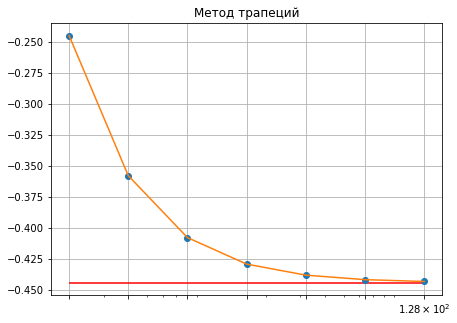

In [14]:
Trapezoidal = SimpsonAndTrapezoidal(numberNodes, "Trapezoidal")
PrintValues(Trapezoidal)
PrintGraph([Trapezoidal],[], "Метод трапеций", 7, 5)

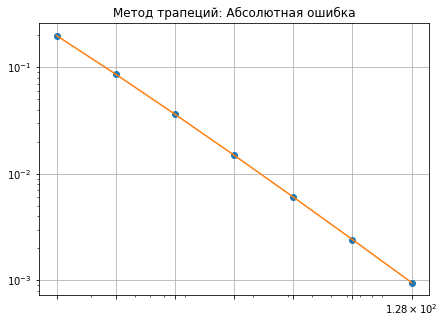

In [15]:
PrintGraph([abs(Trapezoidal - ans)],[], "Метод трапеций: Абсолютная ошибка", 7, 5, False, True)

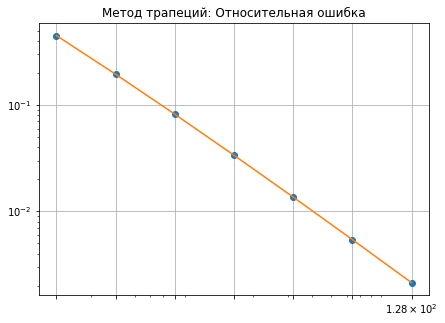

In [16]:
PrintGraph([abs(Trapezoidal - ans) / abs(ans)],[], "Метод трапеций: Относительная ошибка", 7, 5, False, True)

### Метод Симпсона

Количество узлов:             Значение интеграла:      Абсолютная ошибка:       Относительная ошибка:
2                             -0.326757                0.117687                 0.264796       
4                             -0.395786                0.048658                 0.109481       
8                             -0.424753                0.019691                 0.044305       
16                            -0.436603                0.007841                 0.017642       
32                            -0.441361                0.003083                 0.006937       
64                            -0.443245                0.001200                 0.002700       
128                           -0.443981                0.000463                 0.001042       


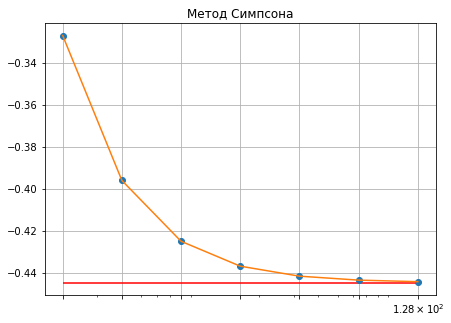

In [17]:
Simpson = SimpsonAndTrapezoidal(numberNodes, "Simpson")
PrintValues(Simpson)
PrintGraph([Simpson],[], "Метод Симпсона", 7, 5)

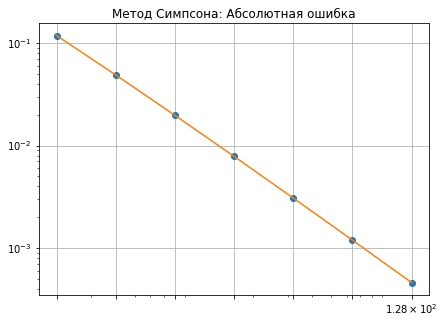

In [18]:
PrintGraph([abs(Simpson - ans)],[], "Метод Симпсона: Абсолютная ошибка", 7, 5, False, True)

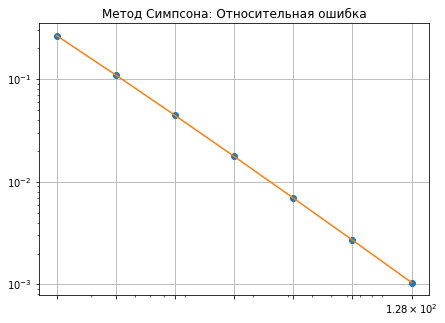

In [19]:
PrintGraph([abs(Simpson - ans) / abs(ans)],[], "Метод Симпсона: Относительная ошибка", 7, 5, False, True)

### Все методы

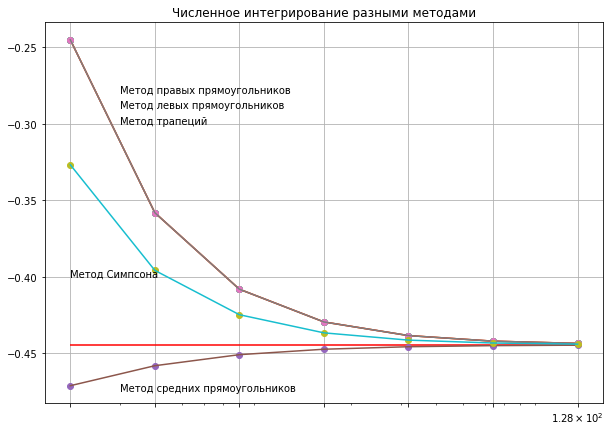

In [29]:
PrintGraph([RightRiemannSum, LeftRiemannSum, MiddleRiemannSum, Trapezoidal, Simpson],
           [
            [0, 0, ""],  
            [3*10**0, -0.28, "Метод правых прямоугольников"],
            [3*10**0,-0.29, "Метод левых прямоугольников"], 
            [3*10**0,-0.475,"Метод средних прямоугольников"],
            [3*10**0, -0.3, "Метод трапеций"],
            [2*10**0,-0.40, "Метод Симпсона"]
           ], 
           "Численное интегрирование разными методами", 10, 7)

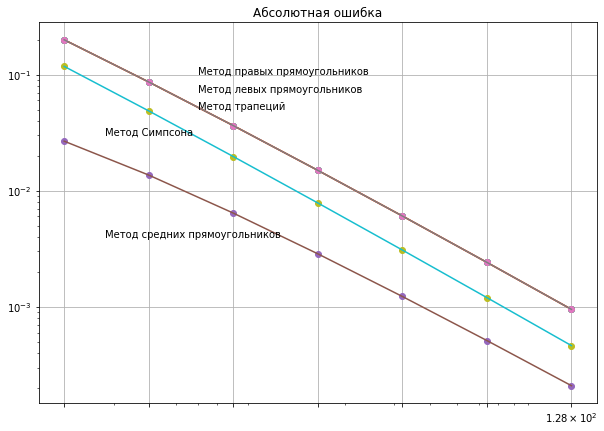

In [21]:
PrintGraph([abs(RightRiemannSum - ans), abs(LeftRiemannSum - ans), abs(MiddleRiemannSum - ans),
            abs(Trapezoidal - ans), abs(Simpson - ans)],
           [
            [6*10**0, 1*10**(-1), "Метод правых прямоугольников"],
            [6*10**0, 7*10**(-2), "Метод левых прямоугольников"], 
            [2.8*10**0, 4*10**(-3), "Метод средних прямоугольников"],
            [6*10**0, 5*10**(-2), "Метод трапеций"],
            [2.8*10**0, 3*10**(-2), "Метод Симпсона"]
           ], 
           "Абсолютная ошибка", 10, 7, False, True)

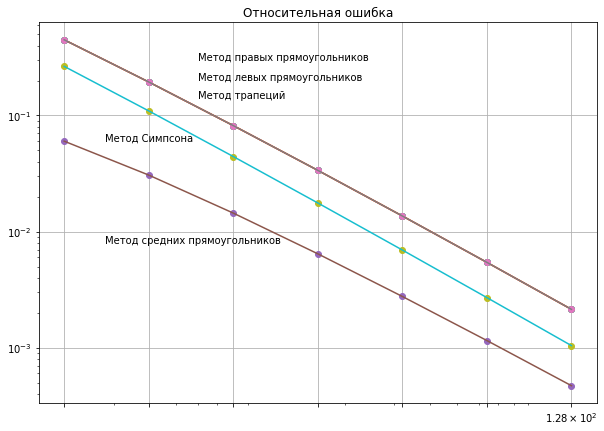

In [22]:
PrintGraph([abs(RightRiemannSum - ans) / abs(ans), abs(LeftRiemannSum - ans) / abs(ans), abs(MiddleRiemannSum - ans) / abs(ans),
            abs(Trapezoidal - ans) / abs(ans), abs(Simpson - ans) / abs(ans)],
           [
            [6*10**0, 3*10**(-1), "Метод правых прямоугольников"],
            [6*10**0, 2*10**(-1), "Метод левых прямоугольников"], 
            [2.8*10**0, 8*10**(-3), "Метод средних прямоугольников"],
            [6*10**0, 1.4*10**(-1), "Метод трапеций"],
            [2.8*10**0, 6*10**(-2), "Метод Симпсона"]
           ], 
           "Относительная ошибка", 10, 7, False, True)

## Вывод:
 - Погрешности изменяются по формуле: $\cfrac{1}{h^n}$, где h - размер шага, n - зависит от метода
 
 - Для численного вычисления $\int_{0}^{1}\sqrt[2]{x}\ln{x}dx $  **самым точным** оказался метод **средних прямоугольников**, не смотря на то, что **порядок сходимости метода Симсона - 4, а средних прямоугольников - 2**:
 
 $$ R_{ср} = \cfrac{b - a}{24} f^{''}(\xi)h^2 $$
 
 $$ R_{ср} <= \cfrac{b - a}{24} max|f^{''}(x_0)|h^2 $$
 
 $$ max|f^{''}(x_0)| = max|\cfrac{ln(x_0)}{4x_0 ^ {3/2}}| $$
 
 $$ lim_{x -> 0}{\cfrac{ln(x)}{4x ^ {3/2}}} = -\infty $$
 
 $$ max|f^{''}(a)| \approx 6,9 * 10^{18} $$
 
------------------------------------------------------------------------------------------------------------------------------- 
 
 $$ R_{сим} = \cfrac{b - a}{180} f^{IV}(\xi)h^4 $$
 
 $$ R_{сим} <= \cfrac{b - a}{180} max|f^{IV}(x_0)|h^4 $$
 
 $$ max|f^{IV}(x_0)| = max|\cfrac{1 - \cfrac{15ln(x_0)}{16}}{x_0 ^ {7/2}}| $$
 
 $$ lim_{x -> 0}{\cfrac{1 - \cfrac{15ln(x_0)}{16}}{x_0 ^ {7/2}}} = +\infty $$
 
 $$ max|f^{IV}(a)| \approx 2.7 * 10^{43} $$
 
------------------------------------------------------------------------------------------------------------------------------
 $$ R_{ср} < R_{сим}  $$

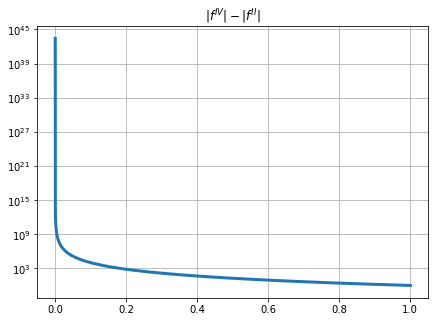

In [31]:
x = np.linspace(1e-12, 1, 10000)
y = ((1 - (15/16 * np.log(x))) / x ** (7/2)) - abs((np.log(x)) / (4 * x ** (3/2)))
plt.yscale('log')
plt.rcParams["figure.figsize"] = 7,5
plt.title(r'$ | f^{IV} | - | f ^ {II} | $')
plt.plot(x, y, linewidth = 3)

plt.grid()
pass


Таким образом, $$ f^{IV} > f^{''}  $$

$$ R_{сим} > R_{ср}  $$

Из-за этого метод средних прямоугольников в данном случае показал результат лучше, чем метод Симпсона